# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: ANOVA
### VIDEO: One-way ANOVA (independent samples)
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [2]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume common across groups)
stdev = 2


In [3]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

# convert to a pandas dataframe
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,2.628114,1
1,3.590082,1
2,5.041793,1
3,1.188543,1
4,3.448763,1
...,...,...
89,4.422888,3
90,4.698624,3
91,5.830633,3
92,7.453124,3


In [4]:
pg.anova(data=df,dv='TheData',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,18.202885,2.240163e-07,0.285747


In [5]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.49579,4.424370,-0.928580,0.515052,-1.802886,0.174592,-0.443209
1,1,3,3.49579,6.657585,-3.161795,0.539082,-5.865143,0.001000,-1.507187
2,2,3,4.42437,6.657585,-2.233216,0.519811,-4.296205,0.001000,-1.065700


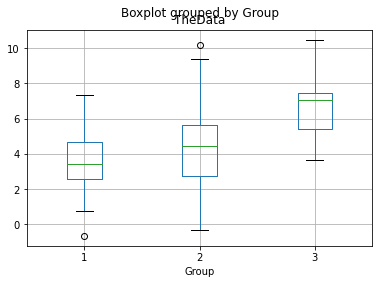

In [20]:
df.boxplot('TheData',by='Group');